<a href="https://colab.research.google.com/github/Navyam-Raushan/Machine-Learning-Models/blob/main/Breast_Cancer_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Introduction

This notebook implements and compares different machine learning models to classify breast cancer using the Breast Cancer Wisconsin Dataset. The models used are:

K-Nearest Neighbors (KNN)

Decision Tree Classifier

Random Forest Classifier

Key performance metrics, such as accuracy, classification reports, and confusion matrices, are used to evaluate each model.

# Importing dependencies



- The required Python libraries are imported, including:

- pandas: Data handling

- sklearn: Machine learning algorithms and metrics



In [53]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

3. Loading the Dataset

The Breast Cancer Wisconsin Dataset is loaded using sklearn.datasets.load_breast_cancer(). The feature matrix X and target variable y are extracted, with only the first two features being used for classification.

In [54]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target


In [76]:
X.size, y.size

(1138, 569)

In [55]:
X[:10]

array([[17.99, 10.38],
       [20.57, 17.77],
       [19.69, 21.25],
       [11.42, 20.38],
       [20.29, 14.34],
       [12.45, 15.7 ],
       [18.25, 19.98],
       [13.71, 20.83],
       [13.  , 21.82],
       [12.46, 24.04]])

# Split the dataset into training and testing sets

- The dataset is split into training and testing sets using an 80-20 ratio.

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

# Standardisation & Normalisation

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Model Training and Evaluation

## 6.1 K-Nearest Neighbors (KNN)

- A KNN classifier with k=5 is trained.

- Predictions are made on the test set.

- Model performance is evaluated using accuracy score, classification report, and confusion matrix.

In [58]:


def train_model(X_train, y_train, model):

  model.fit(X_train, y_train)
  return model


In [59]:
model = train_model(X_train, y_train, KNeighborsClassifier(n_neighbors=5))

In [60]:
y_pred = model.predict(X_test)

## Plotting all the confusion Matrix

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model_name, y_true, y_pred, target_names=None, normalize=False):
    """Plots the confusion matrix as a heatmap.

    Args:
        y_true: 1d array-like, or label indicator array / sparse matrix.
            Ground truth (correct) target values.
        y_pred: 1d array-like, or label indicator array / sparse matrix.
            Estimated targets as returned by a classifier.
        target_names: Optional list of strings for class names.
            If not provided, will use class indices.
    """

    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot heatmap
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # Set axis labels and ticks
    if target_names is not None:
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               xticklabels=target_names, yticklabels=target_names,
               title=f'Confusion matrix for {model_name}',
               ylabel='True label',
               xlabel='Predicted label')
    else:
        ax.set(title='Confusion matrix',
               ylabel='True label',
               xlabel='Predicted label')

    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Add annotations (values inside cells)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

    # Display plot
    fig.tight_layout()
    plt.show()

In [62]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))# Create feature and target arrays

Model accuracy: 0.8883
Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.78      0.82        60
      benign       0.90      0.94      0.92       128

    accuracy                           0.89       188
   macro avg       0.88      0.86      0.87       188
weighted avg       0.89      0.89      0.89       188

Confusion Matrix:
[[ 47  13]
 [  8 120]]


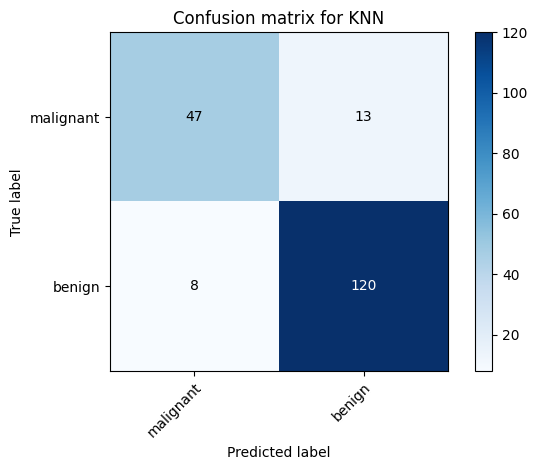

In [63]:
plot_confusion_matrix("KNN", y_test, y_pred, cancer.target_names)

In [64]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))


In [65]:
# Loop over K values - To get best K
for i, k in enumerate(neighbors):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	# Compute training and test data accuracy
	train_accuracy[i] = knn.score(X_train, y_train)
	test_accuracy[i] = knn.score(X_test, y_test)


## 6.2 Finding Optimal K for KNN

The accuracy for different K values (1 to 8) is tested.

A plot of train vs. test accuracy helps in selecting the best K.

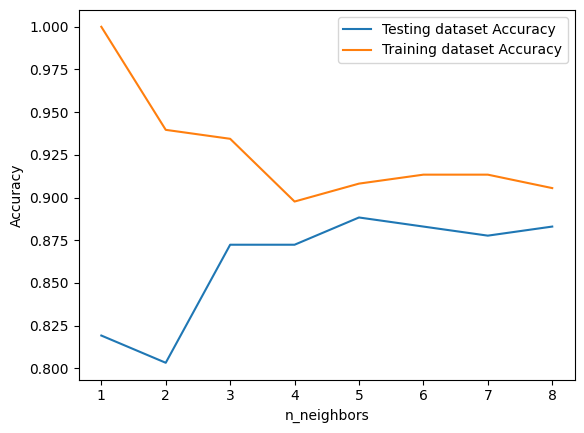

Classification report:               precision    recall  f1-score   support

           0       0.85      0.78      0.82        60
           1       0.90      0.94      0.92       128

    accuracy                           0.89       188
   macro avg       0.88      0.86      0.87       188
weighted avg       0.89      0.89      0.89       188



In [66]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()
print("Classification report:",classification_report(y_test,y_pred))

## 6.3 Decision Tree Classifier

A Decision Tree Classifier is trained and evaluated.

In [67]:
dtc = train_model(X_train, y_train, DecisionTreeClassifier())

In [68]:
y_pred_dtc = dtc.predict(X_test)

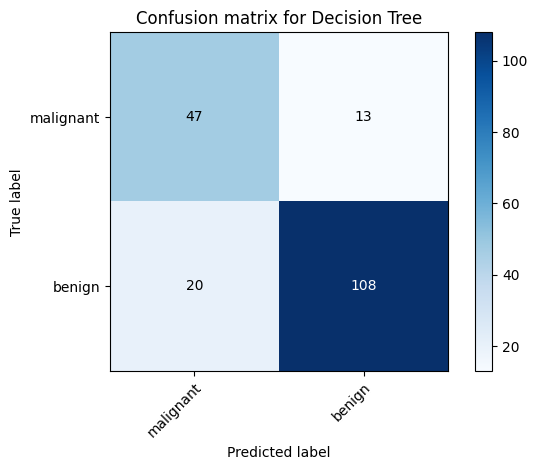

In [69]:
plot_confusion_matrix("Decision Tree", y_test, y_pred_dtc, cancer.target_names)

In [70]:
# Evaluate the model's performance
accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
print(f"Model accuracy: {accuracy_dtc:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dtc, target_names=cancer.target_names))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dtc))# Create feature and target arrays

Model accuracy: 0.8245
Classification Report:
              precision    recall  f1-score   support

   malignant       0.70      0.78      0.74        60
      benign       0.89      0.84      0.87       128

    accuracy                           0.82       188
   macro avg       0.80      0.81      0.80       188
weighted avg       0.83      0.82      0.83       188

Confusion Matrix:
[[ 47  13]
 [ 20 108]]


## 6.4 Random Forest Classifier

A Random Forest Classifier is trained and evaluated.

In [71]:
rf = train_model(X_train, y_train, RandomForestClassifier())

In [72]:
rf_pred = rf.predict(X_test)

In [73]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, rf_pred)
print(f"Model accuracy: {accuracy_dtc:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, rf_pred, target_names=cancer.target_names))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))# Create feature and target arrays

Model accuracy: 0.8245
Classification Report:
              precision    recall  f1-score   support

   malignant       0.77      0.73      0.75        60
      benign       0.88      0.90      0.89       128

    accuracy                           0.85       188
   macro avg       0.82      0.82      0.82       188
weighted avg       0.84      0.85      0.84       188

Confusion Matrix:
[[ 44  16]
 [ 13 115]]


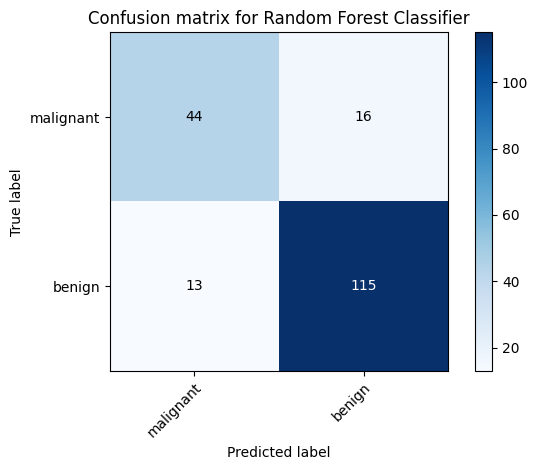

In [74]:
plot_confusion_matrix("Random Forest Classifier", y_test, rf_pred, cancer.target_names)

# 7. Model Comparison

A bar plot is used to compare the accuracy of KNN, Decision Tree, and Random Forest.

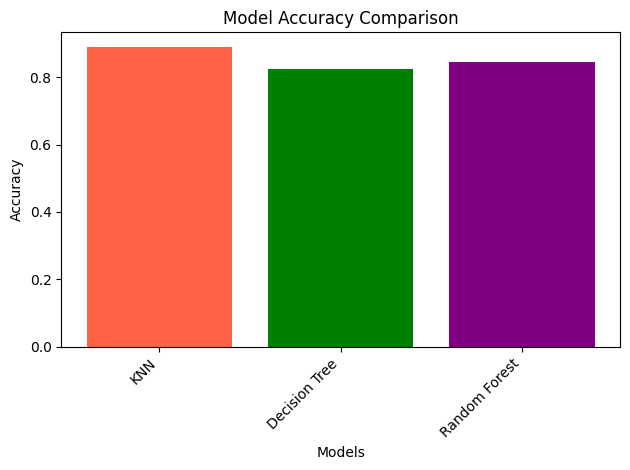

In [75]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_accuracies(model_names, accuracies):
  """
  Plots the accuracies of multiple models.

  Args:
    model_names: A list of model names.
    accuracies: A list of model accuracies.
  """

  # Create bar plot
  colors = ['tomato', 'green', 'purple']
  plt.bar(model_names, accuracies, color=colors)

  # Add labels and title
  plt.xlabel("Models")
  plt.ylabel("Accuracy")


  # Add labels and title
  plt.xlabel("Models")
  plt.ylabel("Accuracy")
  plt.title("Model Accuracy Comparison")

  # Rotate x-axis labels if needed
  plt.xticks(rotation=45, ha='right')  # Adjust rotation and alignment as needed

  # Display plot
  plt.tight_layout()  # Adjust layout for better spacing
  plt.show()


model_names = ['KNN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy, accuracy_dtc, accuracy_rf]
plot_model_accuracies(model_names, accuracies)